In [1]:
import sys
sys.path.append( '/Users/bpb/Data/programming/MetaboliteAtlas/metatlas2p0/metatlas/metatlas' )
import h5_query as h5q
import mzml_loader as mzml_loader
import numpy as np
import tables
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [2]:
mypath = '/Users/bpb/Downloads/20150326_BN6_BN7/'
# mypath = '/Users/bpb/Downloads/'

In [7]:
# import os
# for file in os.listdir(mypath):
#     if file.endswith(".mzML"):
#         filename = '%s%s' % (mypath,file)
#         mzml_loader.mzml_to_hdf(filename)
#         print filename

In [3]:
# myfile = '20141211_caj211_Ecoli_unlabelled_glucose_POS.h5'
# myfile = '2015326_pHILIC_ACN_POS_MSMS_BN7_1062_SAR11_media_WithPolyamines_PPLex_95_Run36.h5'
myfile = '2015326_pHILIC_ACN_POS_MSMS_BN6_1062_SAR11_media_NoOsmolytes_PPLex_26_Run32.h5'
filename = '%s%s' % (mypath,myfile)
fid = tables.open_file(filename)

In [73]:
rt,intensity = h5q.get_XIC(fid, 0, 1000, 1, 1)#, bins=None):

Querying: (ms_level == 1) & (polarity == 1) & (mz >= 0) & (mz <= 1000)


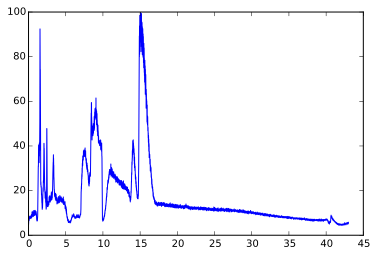

In [74]:
plt.plot(rt,intensity)
plt.show()

In [6]:
ms_level=2
polarity=1
data = h5q.get_data(fid, ms_level, polarity,
                    min_mz=0,
                    max_mz=160,
                    min_rt=8.2,
                    max_rt=8.8,
                    min_precursor_MZ=150.04,
                    max_precursor_MZ=150.07)
#                     min_precursor_intensity=0,
#                     max_precursor_intensity=0,
#                     min_collision_energy=0,
#                     max_collision_energy=0)

Querying: (ms_level == 2) & (polarity == 1) & (rt >= 8.2) & (rt <= 8.8) & (mz >= 0) & (mz <= 160) & (precursor_MZ >= 150.04) & (precursor_MZ <= 150.07)


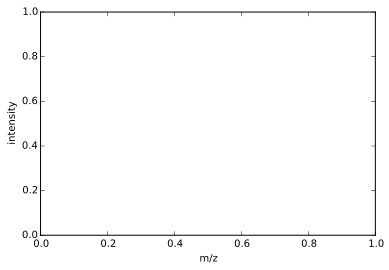

In [12]:
plt.vlines(data['mz'],0,data['i'],color='k',linestyles='solid')
plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.plot(data['mz'],data['i'])
plt.show()

In [8]:
mz_theor = 149.051024 + 1.007276

In [9]:
rt,intensity = h5q.get_XIC(fid, mz_theor - 0.1, mz_theor + 1, 1, 1)

Querying: (ms_level == 1) & (polarity == 1) & (mz >= 149.9583) & (mz <= 151.0583)


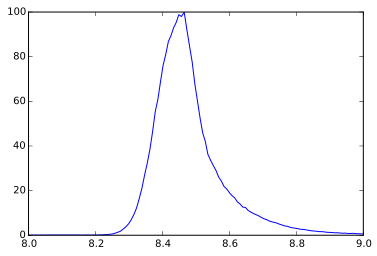

In [76]:
plt.plot(rt,intensity)
plt.xlim(8,9)
plt.show()


In [ ]:
#, min_precursor_MZ=0,max_precursor_MZ=102.1)#, bins=None):

Querying: (ms_level == 1) & (polarity == 1)


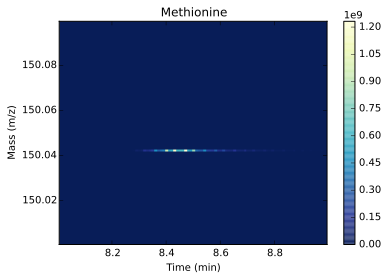

In [6]:
mzEdges = np.linspace(150,150.1,100)
rtEdges = np.linspace(8,9,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Methionine')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

Querying: (ms_level == 1) & (polarity == 1)


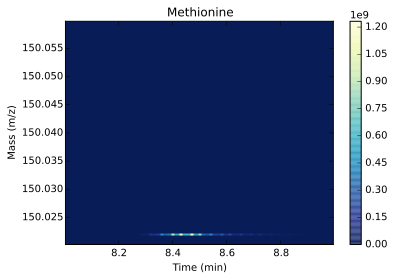

In [7]:
mzEdges = np.linspace(150.02,150.06,100)
rtEdges = np.linspace(8,9,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Methionine')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)



In [ ]:
mzEdges = np.linspace(150,150.1,100)
rtEdges = np.linspace(8,9,100)
ms_level = 1
polarity = 1
hMap = h5q.get_HeatMapRTMZ(fid,mzEdges,rtEdges,ms_level,polarity)
h5q.plot_heatmap(hMap['arr'],hMap['rt_bins'],hMap['mz_bins'],title='Methionine')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)